# Please add your name and ID number to this notebook:

NAME: Tom Keane

ID: 20214537

## Task 1

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import RobustScaler
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

df = pd.read_csv("./bank_et2.csv")
df.tail()

,Unnamed: 0,age,job,marital,education,default,balance,ratio_bal_ln,ratio_ln_inc,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
1995,1995,20.0,student,single,NaN,no,2785,-2.170524,1.081071,no,no,cellular,16,sep,327,2,-1,0,NaN,yes
1996,1996,28.0,admin.,single,secondary,no,127,0.811788,1.134496,no,no,cellular,16,sep,1334,2,-1,0,NaN,yes
1997,1997,81.0,retired,married,primary,no,1154,0.504655,0.042190,no,no,telephone,17,sep,231,1,-1,0,NaN,yes
1998,1998,46.0,services,married,primary,no,4343,-0.965874,0.302708,yes,no,NaN,20,sep,185,1,-1,0,NaN,yes
1999,1999,40.0,entrepreneur,married,secondary,no,6403,-0.800893,1.066659,no,no,cellular,22,sep,208,2,-1,0,NaN,yes


In [2]:
df.isna().sum()

Unnamed: 0        0
age              12
job              10
marital           0
education       104
default           0
balance           0
ratio_bal_ln      0
ratio_ln_inc      0
housing           0
loan              0
contact         191
day               0
month             0
duration          0
campaign          0
pdays             0
previous          0
poutcome        454
subscribed        0
dtype: int64

In [3]:
df_original = df

### first let's get rid of the un-named category as it doesn't contain any useful info.

In [4]:
Unnamed = df.columns[df.columns.str.contains('unnamed',case = False)]
df.drop(Unnamed, axis=1, inplace=True)
df.tail()

,age,job,marital,education,default,balance,ratio_bal_ln,ratio_ln_inc,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
1995,20.0,student,single,NaN,no,2785,-2.170524,1.081071,no,no,cellular,16,sep,327,2,-1,0,NaN,yes
1996,28.0,admin.,single,secondary,no,127,0.811788,1.134496,no,no,cellular,16,sep,1334,2,-1,0,NaN,yes
1997,81.0,retired,married,primary,no,1154,0.504655,0.042190,no,no,telephone,17,sep,231,1,-1,0,NaN,yes
1998,46.0,services,married,primary,no,4343,-0.965874,0.302708,yes,no,NaN,20,sep,185,1,-1,0,NaN,yes
1999,40.0,entrepreneur,married,secondary,no,6403,-0.800893,1.066659,no,no,cellular,22,sep,208,2,-1,0,NaN,yes


### Encode Ordinal Categorical Attributes 

#### education can be ordered as such, with the unknown's as zeros.

In [5]:
# Create a mapper
df['education'] = df['education'].fillna(0)

scale_mapper = {
    "primary": 1,
    "secondary": 2,
    "tertiary": 3
}

df['education'] = df['education'].replace(scale_mapper)

scale_mapper = {
    "jan" : 1,
    "feb" : 2,
    "mar" : 3,
    "apr" : 4,
    "may" : 5,
    "jun" : 6,
    "jul" : 7,
    "aug" : 8,
    "sep" : 9,
    "oct" : 10,
    "nov" : 11,
    "dec" : 12
}

df['month'] = df['month'].replace(scale_mapper)

df.tail()

,age,job,marital,education,default,balance,ratio_bal_ln,ratio_ln_inc,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
1995,20.0,student,single,0,no,2785,-2.170524,1.081071,no,no,cellular,16,9,327,2,-1,0,NaN,yes
1996,28.0,admin.,single,2,no,127,0.811788,1.134496,no,no,cellular,16,9,1334,2,-1,0,NaN,yes
1997,81.0,retired,married,1,no,1154,0.504655,0.042190,no,no,telephone,17,9,231,1,-1,0,NaN,yes
1998,46.0,services,married,1,no,4343,-0.965874,0.302708,yes,no,NaN,20,9,185,1,-1,0,NaN,yes
1999,40.0,entrepreneur,married,2,no,6403,-0.800893,1.066659,no,no,cellular,22,9,208,2,-1,0,NaN,yes


I had considered interpretting `poutcomes` as ordinal as well, with soemthing like -1 for 'failure', 1 for 'success' and 0 for 'other', as they *could* be considered as ordered from least to most preferable from the bank's point of view, but I decided to leave it as is.

I would be interested in other opinions on this.

In [6]:
df.isna().sum()

age              12
job              10
marital           0
education         0
default           0
balance           0
ratio_bal_ln      0
ratio_ln_inc      0
housing           0
loan              0
contact         191
day               0
month             0
duration          0
campaign          0
pdays             0
previous          0
poutcome        454
subscribed        0
dtype: int64

### One-Hot Encoding of non-ordinal categorical features

in order to keep the df a *little* bit more lightweight, drop_first has been used on binary categories, but not for the other categories, because I'm afraid of losing useful information.

For example, drop_first would obscure those with the job role "admin". Although one could infer that if all othe categories are false, then this applicant is in an administrative profession, I would personally prefer to keep this kind of data explicit.

In [7]:
# first one-hot encode the categorical columns with NaNs

df = pd.get_dummies(df, columns=['job'], 
                        dummy_na=True, 
                        drop_first=False)

df = pd.get_dummies(df, columns=['marital', 'contact'], 
                        dummy_na=True, 
                        drop_first=True)

In [8]:
# now one-hot encode all other categorical columns

for c in df.columns:
    if df[c].dtype == object:
        if len(df[c].value_counts()) == 2:
            df = pd.get_dummies(df, drop_first=True, columns=[c])
        else:
            df = pd.get_dummies(df, drop_first=False, columns=[c])  

In [9]:
# Find the number of nulls/NaNs in the dataset

df.isna().sum()

age                  12
education             0
balance               0
ratio_bal_ln          0
ratio_ln_inc          0
day                   0
month                 0
duration              0
campaign              0
pdays                 0
previous              0
job_admin.            0
job_blue-collar       0
job_entrepreneur      0
job_housemaid         0
job_management        0
job_retired           0
job_self-employed     0
job_services          0
job_student           0
job_technician        0
job_unemployed        0
job_nan               0
marital_married       0
marital_single        0
marital_nan           0
contact_telephone     0
contact_nan           0
default_yes           0
housing_yes           0
loan_yes              0
poutcome_failure      0
poutcome_other        0
poutcome_success      0
subscribed_yes        0
dtype: int64

### Impute Missing Values
- age has 12 missing values

I'm goping to impute these by job, and I'm gonna throw in whether or not they're married.

In [10]:
missing_age_rows = df[df.isnull().any(axis=1)]
jobs = [
    'job_admin.',
    'job_blue-collar',
    'job_entrepreneur',
    'job_housemaid',
    'job_management',
    'job_retired',
    'job_self-employed',
    'job_services',
    'job_student',
    'job_technician',
    'job_unemployed',
    'job_nan',
    'marital_married',
    'marital_single'
]
print(missing_age_rows.loc[:, jobs])

      job_admin.  job_blue-collar  job_entrepreneur  job_housemaid  \
456            0                0                 0              0   
472            0                1                 0              0   
526            0                0                 0              0   
595            0                0                 0              0   
597            0                0                 0              0   
601            1                0                 0              0   
605            0                0                 0              0   
744            0                0                 0              0   
795            0                0                 0              0   
1171           0                0                 0              0   
1232           0                0                 0              0   
1408           0                0                 0              0   

      job_management  job_retired  job_self-employed  job_services  \
456                

we don't need to include job_entrepreneur,  job_housemaid, job_unemployed,  job_nan

In [11]:

jobs = [
    'job_admin.',
    'job_blue-collar',
    'job_management',
    'job_retired',
    'job_self-employed',
    'job_services',
    'job_student',
    'job_technician',
    'marital_married',
    'marital_single'
]

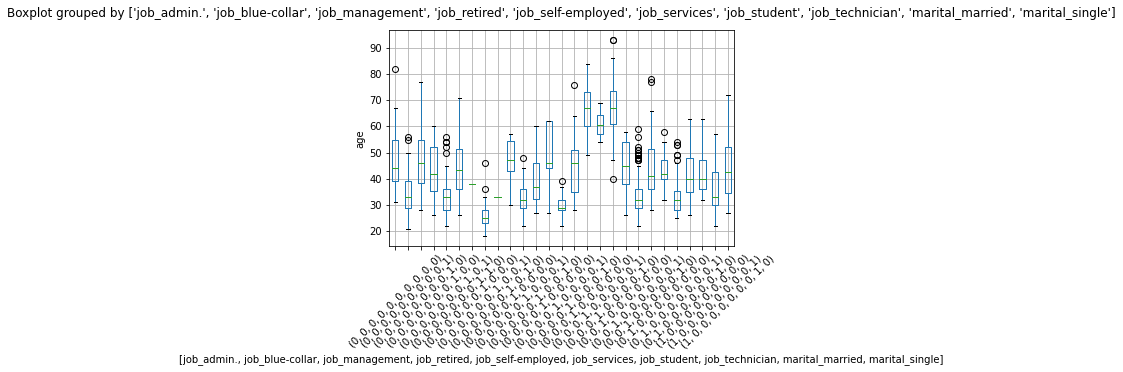

In [12]:
df.boxplot(column='age', by=jobs, rot=45)
plt.title("")
plt.ylabel("age")
plt.show()

In [13]:
ptable = df.pivot_table(values='age', 
                        columns=jobs,  
                        aggfunc=(
                            np.mean,
                            np.median,
                            lambda x: x.mode().iat[0]
                            ))
ptable

job_admin.                 0                                              \
job_blue-collar            0                                               
job_management             0                                               
job_retired                0                                               
job_self-employed          0                                               
job_services               0                                               
job_student                0                                               
job_technician             0                                1              
marital_married            0                     1          0              
marital_single             0          1          0          0          1   
<lambda_0>         39.000000  29.000000  55.000000  35.000000  35.000000   
mean               48.111111  34.372549  46.777778  43.225806  33.318966   
median             44.000000  33.000000  46.000000  42.000000  33.000000   

job_admin.                                                   ...             \
job_blue-collar                                              ...              
job_management                                               ...              
job_retired                                                  ...          1   
job_self-employed                                            ...          0   
job_services                                              1  ...          0   
job_student                   1                           0  ...          0   
job_technician                0                           0  ...          0   
marital_married         1     0                1          0  ...          1   
marital_single          0     0          1     0          0  ...          0   
<lambda_0>         34.000  38.0  24.000000  33.0  43.000000  ...  64.000000   
mean               43.885  38.0  25.462366  33.0  46.631579  ...  67.201681   
median             43.500  38.0  25.000000  33.0  47.000000  ...  67.000000   

job_admin.                                                           \
job_blue-collar                                        1              
job_management        1                                0              
job_retired           0                                0              
job_self-employed     0                                0              
job_services          0                                0              
job_student           0                                0              
job_technician        0                                0              
marital_married       0                     1          0              
marital_single        0          1          0          0          1   
<lambda_0>         57.0  31.000000  37.000000  41.000000  33.000000   
mean               45.0  33.830303  43.536885  43.272727  33.325301   
median             45.0  32.000000  41.000000  42.000000  32.000000   

job_admin.                           1                      
job_blue-collar                      0                      
job_management                       0                      
job_retired                          0                      
job_self-employed                    0                      
job_services                         0                      
job_student                          0                      
job_technician                       0                      
marital_married            1         0                   1  
marital_single             0         0         1         0  
<lambda_0>         39.000000  35.00000  33.00000  33.00000  
mean               42.130208  42.78125  36.22093  43.59375  
median             40.000000  40.00000  33.00000  42.50000  

[3 rows x 27 columns]

multiple aggregate functions could be used for our imputation, it seems that the mean has the least variation, with most being a bit too close to the 40 years for suitability.

I am tempted to use the mode (<lambda_0>), as it has the most variation. It does seem to skew to a slightly lower age for each category, but they must be realistic values, given that these are the most common ages of people in each profession.

The median also has satisfactory variability, but I will settle with the mode, though both seem equally valid.

Because there are only 12 missing age values, using this data on applicant professions & marital status to inform our imputing of these will have little negative affects on our ML model anyway.

In [14]:
print(df['age'].dtype)

float64


In [15]:
ptable = df.pivot_table(values='age', 
                        columns=jobs,  
                        aggfunc=(
                            lambda x: x.mode().iat[0]
                        ))
ptable

job_admin.            0                                                        \
job_blue-collar       0                                                         
job_management        0                                                         
job_retired           0                                                         
job_self-employed     0                                                         
job_services          0                                                     1   
job_student           0                                   1                 0   
job_technician        0                 1                 0                 0   
marital_married       0           1     0           1     0           1     0   
marital_single        0     1     0     0     1     0     0     1     0     0   
age                39.0  29.0  55.0  35.0  35.0  34.0  38.0  24.0  33.0  43.0   

job_admin.         ...                                               1        \
job_blue-collar    ...                             1                 0         
job_management     ...           1                 0                 0         
job_retired        ...     1     0                 0                 0         
job_self-employed  ...     0     0                 0                 0         
job_services       ...     0     0                 0                 0         
job_student        ...     0     0                 0                 0         
job_technician     ...     0     0                 0                 0         
marital_married    ...     1     0           1     0           1     0         
marital_single     ...     0     0     1     0     0     1     0     0     1   
age                ...  64.0  57.0  31.0  37.0  41.0  33.0  39.0  35.0  33.0   

job_admin.               
job_blue-collar          
job_management           
job_retired              
job_self-employed        
job_services             
job_student              
job_technician           
marital_married       1  
marital_single        0  
age                33.0  

[1 rows x 27 columns]

In [16]:
# Define function to return an element of the pivot table
def get_element(x):
    el = ptable.loc(axis=1)[
        x['job_admin.'],
        x['job_blue-collar'],
        x['job_management'],
        x['job_retired'],
        x['job_self-employed'],
        x['job_services'],
        x['job_student'],
        x['job_technician'],
        x['marital_married'],
        x['marital_single']
    ]
    return el['age']

# Replace missing values
df['age'].fillna(df[df['age'].isnull()].apply(get_element, axis=1), inplace=True)

In [17]:
df = df.apply(lambda col:pd.to_numeric(col, errors='coerce'))

In [18]:
df.isna().sum()

age                  0
education            0
balance              0
ratio_bal_ln         0
ratio_ln_inc         0
day                  0
month                0
duration             0
campaign             0
pdays                0
previous             0
job_admin.           0
job_blue-collar      0
job_entrepreneur     0
job_housemaid        0
job_management       0
job_retired          0
job_self-employed    0
job_services         0
job_student          0
job_technician       0
job_unemployed       0
job_nan              0
marital_married      0
marital_single       0
marital_nan          0
contact_telephone    0
contact_nan          0
default_yes          0
housing_yes          0
loan_yes             0
poutcome_failure     0
poutcome_other       0
poutcome_success     0
subscribed_yes       0
dtype: int64

# task 2
## treatment of outliers 

In [19]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import RobustScaler
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

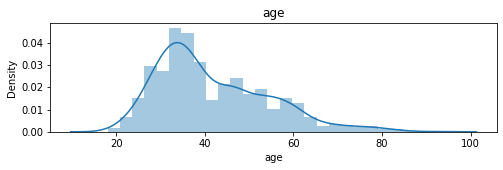

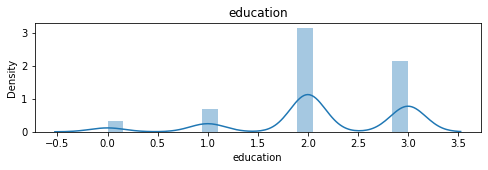

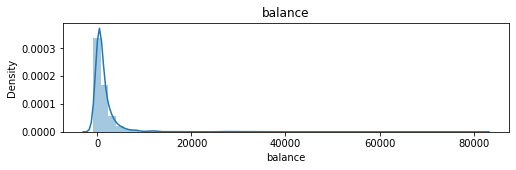

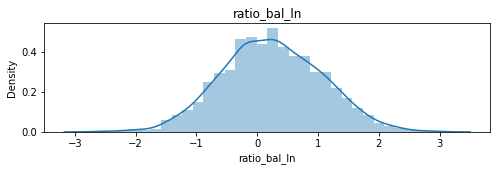

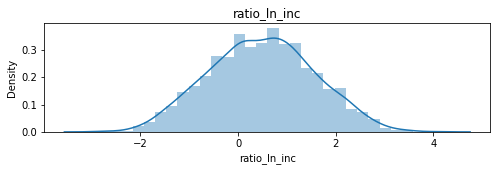

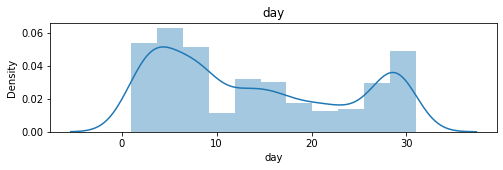

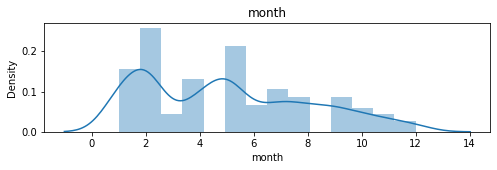

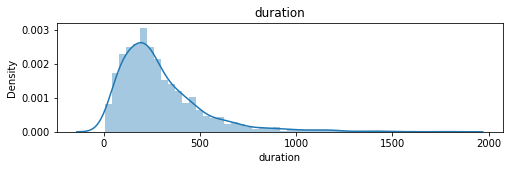

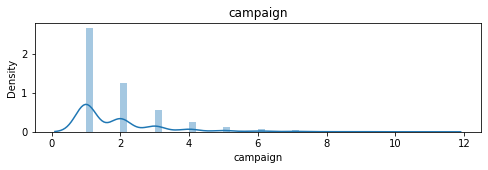

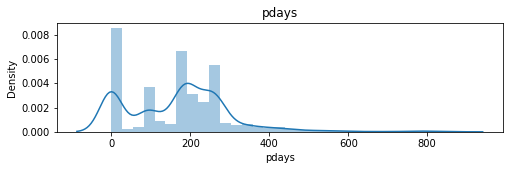

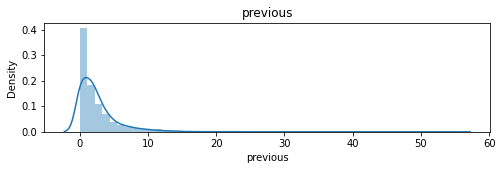

In [20]:
for feature in df.columns:
    if df[feature].dtype == "int64" or df[feature].dtype == "float64":
        plt.figure(figsize=(8,2))
        sns.distplot(df[feature])
        plt.title(feature)
        plt.show()

balance, duration and previous display outliers.

In [21]:
df[['balance', 'duration', 'previous']].min()

balance    -980
duration      7
previous      0
dtype: int64

shift negative balances into positive to allow for logarithmic transformation of data, to make outliers easier to handle. In order for this, these colunmns must be > 0, so I have shifted them to be $[1, +\infty]$

In [22]:
def logarithmic_transform(feature):
    if feature.min() <= 0:
        new_feature = np.log(feature + -1*(feature.min()-1))
    else:
        new_feature = np.log(feature)
    return new_feature



# Use a log transformation to decrease the impact of outliers
df['balance'] =  logarithmic_transform(df['balance'])
df['duration'] = logarithmic_transform(df['duration'])
df['previous'] = logarithmic_transform(df['previous'])

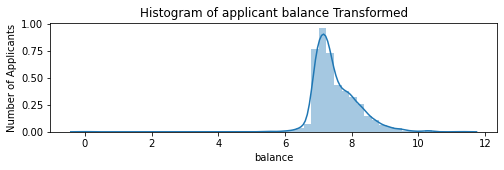

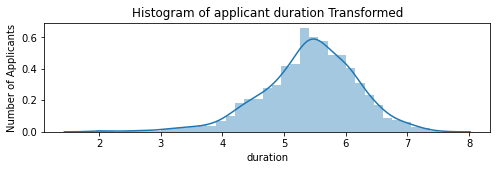

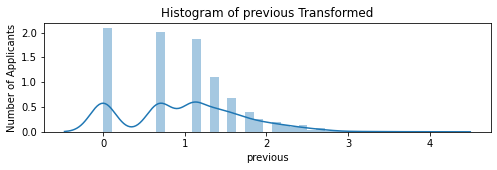

In [23]:
# Create figure with two subplots

# Plot balance
fig = plt.figure(figsize=(8, 2))
ax1 = fig.add_subplot()
ax1.set_title("Histogram of applicant balance Transformed")
ax1.set_xlabel('applicant balance')
ax1.set_ylabel('Number of Applicants')
sns.distplot(df['balance'])
plt.show()

# Plot duration (of last call)
fig = plt.figure(figsize=(8, 2))
ax3 = fig.add_subplot()
ax3.set_title("Histogram of applicant duration Transformed")
ax3.set_xlabel('duration')
ax3.set_ylabel('Number of Applicants')
sns.distplot(df['duration'])
plt.show()

#previous 
fig = plt.figure(figsize=(8, 2))
ax3 = fig.add_subplot()
ax3.set_title("Histogram of previous Transformed")
ax3.set_xlabel('previous')
ax3.set_ylabel('Number of Applicants')
sns.distplot(df['previous'])

plt.show()

transformed features are less skewed and have distributions closer to normal than the original features `duration` and `balance`.

not sure if the new distribution of `previous` is more or less useful than before, as it is stil not very normal, but we'll see..

# task 3
## creating derived features

A derived feature could be day_of_year, which would be a combination of the day and month features.
Because there's no way of knowing if all of the rows were entered in the same year, day_of_year is a suitable for cyclical encoding.

As an aside, this method is actually quite innacurate as it doesn't account for leap years, but for illustrative purposes, we'll work under the assumption that leap years don't exist.

In [24]:
def make_days_of_year_feature(df):
    month_lengths = np.array([ 0,  31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31  ])
    day_of_year_continuous = np.zeros((2000))
    cos_day_of_year = np.zeros((2000))
    sin_day_of_year = np.zeros((2000))

    for index, row in df.iterrows():
        day_of_year_continuous[index] = np.sum(month_lengths[0:int(row['month'])]) + row['day']
        cos_day_of_year[index] = np.cos(2* np.pi * day_of_year_continuous[index]/365)
        sin_day_of_year[index] = np.sin(2* np.pi * day_of_year_continuous[index]/365)
    df['day_of_year_continuous'] = day_of_year_continuous
    df['cos_day_of_year'] = cos_day_of_year
    df['sin_day_of_year'] = sin_day_of_year
    return df  

def plot_cyclic_day_of_year(df, investigating_subscriptions=False):
    plt.figure(figsize=(7,7))
    if not investigating_subscriptions:
        plt.scatter(df['cos_day_of_year'], df['sin_day_of_year'])
    else:
        plt.scatter(df['cos_day_of_year'], df['sin_day_of_year'], c=df['subscribed_yes'])
    plt.xlabel("cos")
    plt.ylabel("sin")
    plt.xlim(-1.1, 1.1)
    plt.ylim(-1.1, 1.1)
    plt.title("cyclical illustration of day_of_year in data-set")
    plt.annotate('Winter', xy=(1., 0), xycoords='data', bbox=dict(boxstyle='round,pad=0.2', fc='yellow', alpha=0.3))
    plt.annotate('Summer', xy=(-0.95, 0), xycoords='data', bbox=dict(boxstyle='round,pad=0.2', fc='yellow', alpha=0.3))
    plt.annotate('Spring', xy=(-0.1, 1.05), xycoords='data', bbox=dict(boxstyle='round,pad=0.2', fc='yellow', alpha=0.3))
    plt.annotate('Autumn', xy=(-0.1, -1.07), xycoords='data', bbox=dict(boxstyle='round,pad=0.2', fc='yellow', alpha=0.3))
    plt.show()

days of year min, max (28.0, 364.0)


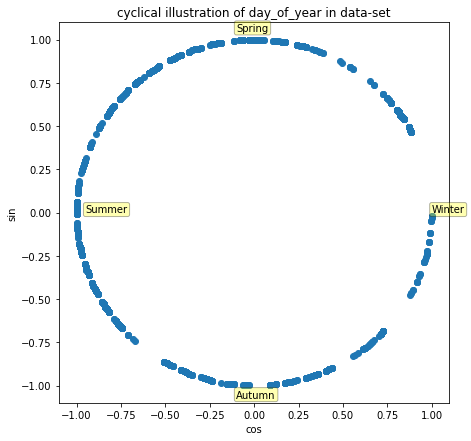

In [25]:
df = make_days_of_year_feature(df)
print(f"days of year min, max {df.day_of_year_continuous.min(), df.day_of_year_continuous.max()}")
plot_cyclic_day_of_year(df)

Here, we can see a clear illustration of a slow period for the first 28 days there are no contacts made.

As an aside, I personally also like that for example, from Spring to Summer we can clearly see 12 somewhat distinct blobs, one for each week of that season. If I had more time, I would try to implement a a heat map, color coding the most busy periods annually.

Now, let's see if there's any useful information this can give us, with regards to *subscriptions*

subscribed:
0    1000
1    1000
Name: subscribed_yes, dtype: int64


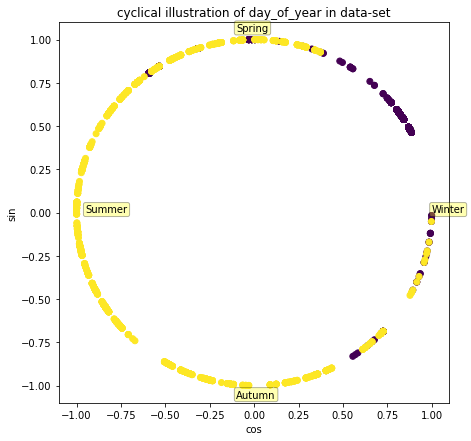

In [26]:
print(f"subscribed:\n{df['subscribed_yes'].value_counts()}")
plot_cyclic_day_of_year(df, investigating_subscriptions=True)

Although there are equal numbers between subscribers and non-subscribers, we can clearly see that those who are NOT-subscribed, are far more likely to have made their last contact in late winter/ early spring, and then there are some outliers throughout Autumn through mid-Winter.

On the other hand, subscribers are about euqally as likely to have last contacted thoughout all other times of year.

to confirm this observation, I will repeat these plots with the subscribed and non-subscribed groups separated. 

In [27]:
def plot_cyclic_day_of_year_with_subscribers_separated(df):
    print("Here are the subscribers and non-subscribers separated.\n")
    print("\nsubscribed group")
    subscriber_group = df[df['subscribed_yes']==1]
    plot_cyclic_day_of_year(subscriber_group)
    print("\nnon-subscribed group")
    subscriber_group = df[df['subscribed_yes']==0]
    plot_cyclic_day_of_year(subscriber_group)

Here are the subscribers and non-subscribers separated.


subscribed group


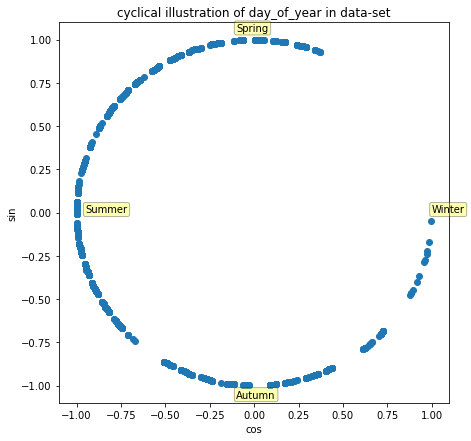


non-subscribed group


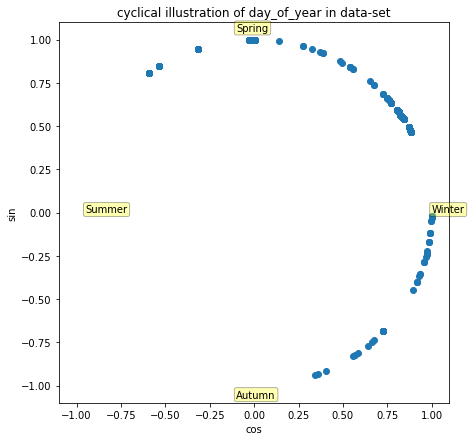

In [28]:
plot_cyclic_day_of_year_with_subscribers_separated(df)

I can conclude that this has been a useful choice within the context of the 2-class classification problem I defined in Etivity 1 (*subscribers*).

# TASK 4

Using the dataset provided in the template notebook (using "make_moons"), perform a classification on the data using scikitlearn’s logistic regression.

Generate plots of the approximate probability $P[Ein-Eout|>e]$. You can use the exact same approach as in E-tivity 1. In the same figure, plot the Hoeffding bound and the VC bound and check whether or not either bound is exceeded (indicate this clearly in a markdown cell).

I will perform 100 Logistic Regressions on the data-set within a pocket algorithm, and investigate whether the Vapnik-Chervonenkis bound is exceeded in error-analysis

In [29]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_moons
# from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
import math
# from sklearn.datasets.samples_generator import make_blobs
# from sklearn.model_selection import train_test_split
import random as rnd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [30]:
def moons_pla_setup(n_samples=2000, noise=0.05, plot=True):
    X, y = make_moons(n_samples=2000, noise=0.05)
    X = preprocessing.scale(X)
    y = [yy if yy == 1 else -1 for yy in y]
    if plot == True:
        plot_data_set(X, y)
    return X, y

def plot_data_set(X, y):
    plt.scatter(X[:,0], X[:,1], c=y)
    plt.title("moons")
    plt.xlabel('$x_a$')
    plt.ylabel('$x_b$')
    plt.show()

Hoeffding Inequality:


$P[|E_{in}-E_{out}|>\epsilon]$ $\le$ $2e^{-2N\epsilon^2}$

### Vapnik-Chervonenkis Inequality:


$P[|E_{in}-E_{out}|>\epsilon]$ $\le$ $4m_{𝓗}(2N)e^{-(1/8)N\epsilon^2}$ ,

which in cases of high N 

where

$m_{𝓗}$(N) $\le$ $\sum_{i=1}^{d_{VC}} {N \choose i}$ 

in order to to determine our growth function ($m_{𝓗}$(N)), we must first figure out the *Vapnik-Chervonenkis Dimension* ($d_{VC} $) relating to our model.

Our data-set has two input features (2d).

For a set of 4 data-points in a 2d plane, there is no separating hyper plane can be drawn to permutate each dichotomy.

However with 3 data-points, this is possible, so therefore the Vapnik-Chervonenkis dimension ($d_{VC} $) is 3.

In [31]:
import operator as op
from functools import reduce

def ncr(n, r):
    #stackoverflow
    # n choose r
    r = min(r, n-r)
    numer = reduce(op.mul, range(n, n-r, -1), 1)
    denom = reduce(op.mul, range(1, r+1), 1)
    return numer // denom

def m_H(N, d_VC=3):
    # Growth_function
    N_Choose_i_array = [ncr(N, i) for i in range(d_VC)]
    m_H = sum( N_Choose_i_array )
    return m_H

def VC_value(N, epsilon):
    return 4 * m_H(2*N) * math.exp((-N/8)*epsilon**2)

def hoeffding_value(N, epsilon):
	return 2.0 * math.exp (-2*N*epsilon**2)

def pocket_logistic_regression_model(X_train, X_test, Y_train, Y_test, pocket_runs, test_data=False):
    model_errors = []
    model = LogisticRegression(max_iter=5000)
    mostrecent_error = 0
    for i in range(pocket_runs):
        if test_data:
            current_error = 1 - model.fit(X_train, Y_train).score(X_test, Y_test)
        else:
            current_error = 1 - model.fit(X_train, Y_train).score(X_train, Y_train)
        if i > 0 and current_error > mostrecent_error:
            model_errors.append(mostrecent_error)
        else:
            model_errors.append(current_error)
            mostrecent_error = current_error
    return model_errors

## - plot the Hoeffding bound and the VC bound and check whether or not either bound is exceeded 

In [32]:
def run_error_analysis(X_train, X_test, Y_train, Y_test, test_data=False):
    N =  len(X_train)
    epsilons = np.arange(0, 1, 0.01)
    epsilon_plot=[]
    model_scores = pocket_logistic_regression_model(X_train, X_test, Y_train, Y_test, 100, test_data=test_data)

    for tolerance in epsilons:
        epsilon_plot.append(  len([1 for E_in in model_scores if abs(E_in-0.5) > tolerance]) /len(model_scores)  )
    Hoeff_bound = [hoeffding_value(N, e) for e in epsilons]
    VC_bound = [VC_value(N, e) for e in epsilons]
    plt.figure(figsize=(15,5))
    plt.xlabel("Epsilon")
    plt.plot(epsilons, epsilon_plot, label="error")
    plt.plot(epsilons, Hoeff_bound, label="hoeff")
    plt.plot(epsilons, VC_bound, label="VC")
    plt.legend(loc='best')
    plt.ylim(0, 4)
    test_type_string = "testing" if test_data else "training"
    plt.title(f"plot of P[Ein-Eout|>e] for a logistic regression model, with model's tests using {test_type_string} data")
    plt.show()

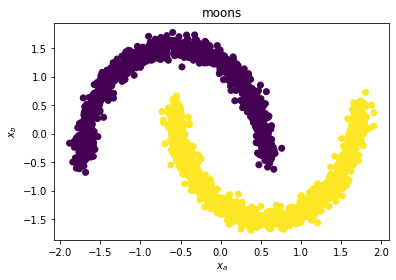

In [33]:
X, y = moons_pla_setup()
X_train, X_test, Y_train, Y_test = train_test_split(X,y, test_size=0.25)
model = LogisticRegression(max_iter=100)

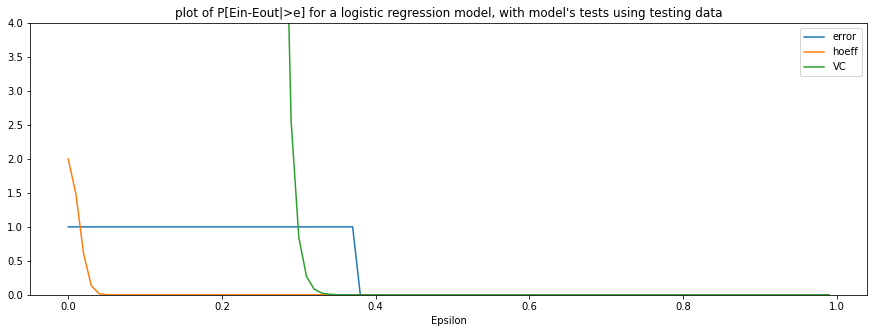

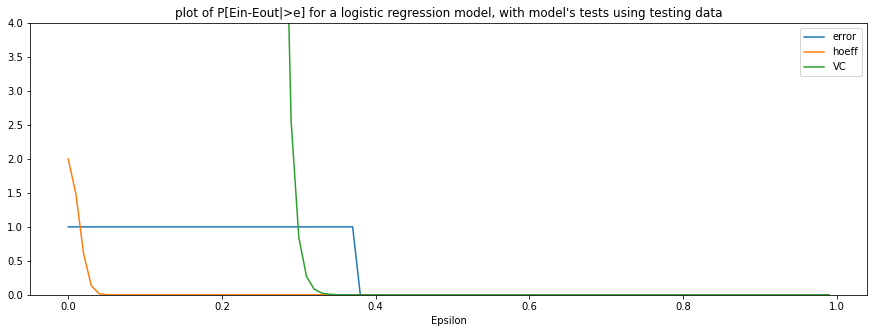

In [34]:
run_error_analysis(X_train, X_test, Y_train, Y_test, model)
run_error_analysis(X_train, X_test, Y_train, Y_test, test_data=True)

I was also curious to see the difference in performance when scoring the models error on the training and test data separately.

- According to these plots, our model does not yet obey VC or Hoeffding bounds.

- predictably, the model requires (very) slightly more tolerance when being tested on unseen points

Now let's do it again, with a smaller training set, to reduce N and loosen our bounds a little bit.

In [35]:
X_train, X_test, Y_train, Y_test = train_test_split(X,y, test_size=0.6)
model = LogisticRegression(max_iter=100)

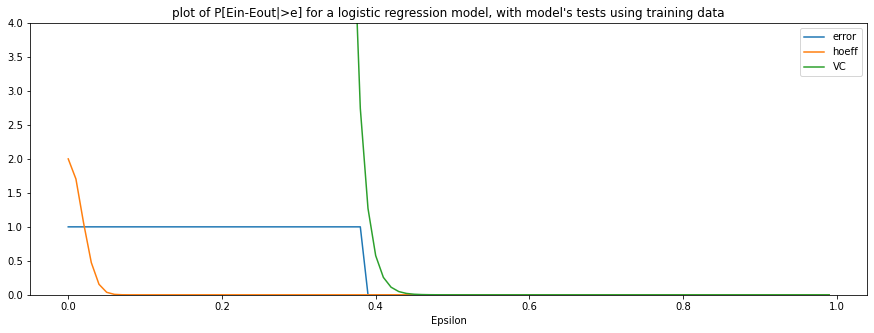

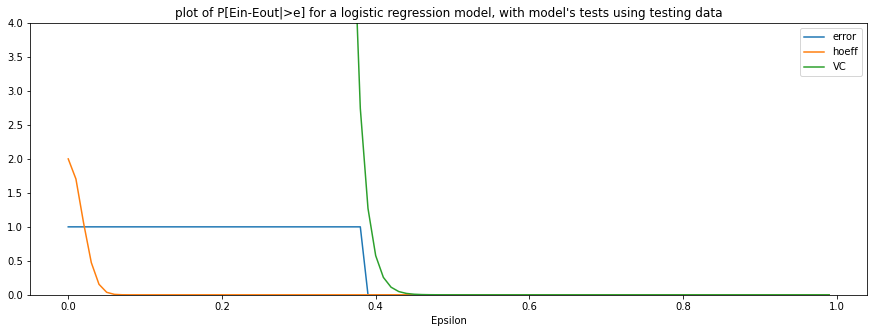

In [36]:
run_error_analysis(X_train, X_test, Y_train, Y_test)
run_error_analysis(X_train, X_test, Y_train, Y_test, test_data=True)

- When we reduce the training set to be less than half of the over-all set (40% of 2000 samples -> 800 samples), the model begins to obey the VC bound.

# TASK 5

Using the dataset, make learning curves for logistic regression and two other machine learning algorithms of your choosing using scikitlearn’s learning_curve functionality. Choose one algorithm with low complexity in terms of VC dimension and one algorithm with high complexity.

In [37]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_moons
# # from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
# import math
# # from sklearn.datasets.samples_generator import make_blobs
# # from sklearn.model_selection import train_test_split
# import random as rnd
from sklearn.model_selection import learning_curve
import pandas as pd

In [38]:
def moons_pla_setup(n_samples=2000, noise=0.05, plot=True):
    X, y = make_moons(n_samples=2000, noise=0.05)
    X = preprocessing.scale(X)
    y = [yy if yy == 1 else -1 for yy in y]
    if plot == True:
        plot_data_set(X, y)
    return X, y

def plot_data_set(X, y):
    plt.scatter(X[:,0], X[:,1], c=y)
    plt.title("moons")
    plt.xlabel('$x_a$')
    plt.ylabel('$x_b$')
    plt.show()

def describe_results(scores):
    values = np.array( [x for x in scores.values if x != 'nan'] )
    description = {
        "first"        : round(values[0], 3),
        "last"         : round(values[-1], 3),
        "mean"         : round(values.mean(), 3),
        "min"          : round(values.min(), 3),
        "max"          : round(values.max(), 3),
        "std deviation": round(values.std(), 3)
    }
    return description

In [39]:
def learn_data_with_model(X,y, model):
    train_sizes, train_scores, valid_scores = learning_curve(model, X, y, train_sizes=np.arange(0.02, 1, 0.01), cv=5)
    train_scores_mean = 1 - train_scores.mean(axis = 1)
    validation_scores_mean =1 - valid_scores.mean(axis = 1)
    print('Mean training errors\n', describe_results(pd.Series(train_scores_mean, index = train_sizes)))
    print('-' * 20) # separator
    print('Mean validation errors\n',describe_results(pd.Series(validation_scores_mean, index = train_sizes)))
    return train_sizes, train_scores_mean, validation_scores_mean

def plot_learning_curve(train_sizes, train_scores_mean, validation_scores_mean, model_name):
    plt.style.use('seaborn')
    plt.plot(train_sizes, train_scores_mean, label = 'Training error')
    plt.plot(train_sizes, validation_scores_mean, label = 'Validation error')
    plt.ylim([0,0.25])
    plt.ylabel('MSE', fontsize = 14)
    plt.xlabel('Training set size', fontsize = 14)
    plt.title(f'Learning curves for {model_name} model')
    plt.legend()
    plt.show()

def make_learning_curve_for_Moons(X, y, model):
    print(f"\n\n{model.__class__.__name__}\n")
    train_sizes, train_scores_mean, validation_scores_mean = learn_data_with_model(X, y, model)
    plot_learning_curve(train_sizes, train_scores_mean, validation_scores_mean, model.__class__.__name__)
    return f"{model.__class__.__name__}"

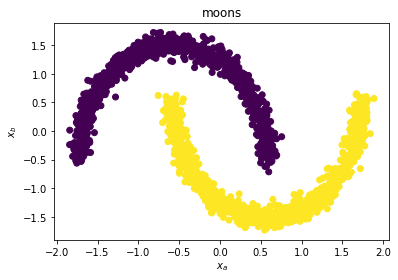



LogisticRegression

Mean training errors
 {'first': 0.169, 'last': 0.111, 'mean': 0.108, 'min': 0.093, 'max': 0.169, 'std deviation': 0.008}
--------------------
Mean validation errors
 {'first': 0.142, 'last': 0.112, 'mean': 0.114, 'min': 0.111, 'max': 0.142, 'std deviation': 0.004}


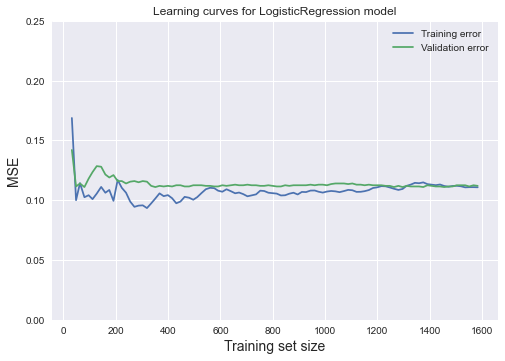



Perceptron

Mean training errors
 {'first': 0.169, 'last': 0.149, 'mean': 0.151, 'min': 0.107, 'max': 0.214, 'std deviation': 0.023}
--------------------
Mean validation errors
 {'first': 0.15, 'last': 0.157, 'mean': 0.156, 'min': 0.121, 'max': 0.227, 'std deviation': 0.024}


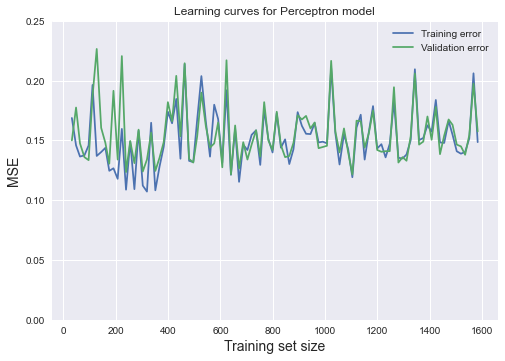



BaggingClassifier

Mean training errors
 {'first': 0.0, 'last': 0.0, 'mean': 0.001, 'min': 0.0, 'max': 0.017, 'std deviation': 0.002}
--------------------
Mean validation errors
 {'first': 0.146, 'last': 0.005, 'mean': 0.013, 'min': 0.004, 'max': 0.146, 'std deviation': 0.018}


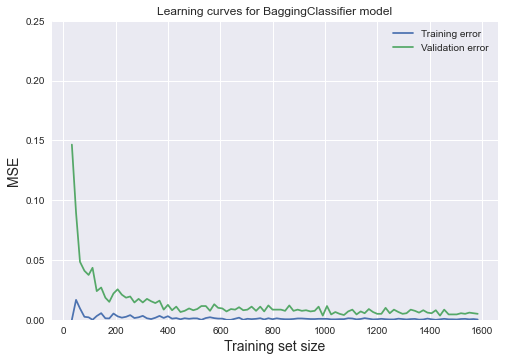

['LogisticRegression', 'Perceptron', 'BaggingClassifier']

In [40]:
from sklearn.linear_model import LogisticRegression, Perceptron
from sklearn.ensemble import BaggingClassifier

models = [LogisticRegression(), Perceptron(), BaggingClassifier()]
X, y = moons_pla_setup()
[make_learning_curve_for_Moons(X, y, model) for model in models]

# Here is some documentation on the MLAs used.
(from sklearn docs)

## Logistic regression (fairly non-complex)

despite its name, is a linear model for classification rather than regression. Logistic regression is also known in the literature as logit regression, maximum-entropy classification (MaxEnt) or the log-linear classifier. In this model, the probabilities describing the possible outcomes of a single trial are modeled using a logistic function.

Logistic regression is implemented in LogisticRegression. This implementation can fit binary, One-vs-Rest, or multinomial logistic regression with optional, or Elastic-Net regularization.

## The Perceptron (non-complex)

another simple classification algorithm suitable for large scale learning. By default:

        It does not require a learning rate.

        It is not regularized (penalized).

        It updates its model only on mistakes.

The last characteristic implies that the Perceptron is slightly faster to train than SGD with the hinge loss and that the resulting models are sparser.

## A Bagging classifier (complex)

A Bagging classifier is an ensemble meta-estimator that fits base classifiers each on random subsets of the original dataset and then aggregate their individual predictions (either by voting or by averaging) to form a final prediction. Such a meta-estimator can typically be used as a way to reduce the variance of a black-box estimator (e.g., a decision tree), by introducing randomization into its construction procedure and then making an ensemble out of it.

This algorithm encompasses several works from the literature. When random subsets of the dataset are drawn as random subsets of the samples, then this algorithm is known as Pasting [1]. If samples are drawn with replacement, then the method is known as Bagging [2]. When random subsets of the dataset are drawn as random subsets of the features, then the method is known as Random Subspaces [3]. Finally, when base estimators are built on subsets of both samples and features, then the method is known as Random Patches.

## Here's some more on Bagging
(from geeksforgeeks)

### 1 - Bagging

- first the data is shuffled through a process called 'bagging'

Bagging resamples the original training dataset with replacement. Some instance(or data) may be present multiple times while others are left out.

### 2 - training
 - described in cell below as pseudo-code

In [41]:
# Let N be the size of the training set.
# for each of t iterations of training sets from bagging:
#     sample N instances with replacement from the original training set.
#     apply the learning algorithm to the sample.
#     store the resulting classifier.

# Classification:
# for each of the t classifiers:
#     predict class of instance using classifier.
# return class that was predicted most often.

# TASK 6

Comment on what information you can derive from the learning curves  (in a markdown cell) and how this information differs between simple and complex machine learning algorithms.

There is a large difference in performance between the three learning algorithms ('LogisticRegression', 'Perceptron', 'BaggingClassifier').

The LogisticRegression (LR) model seems to have the worst performance (about 0.11 error rate.) as the training set size approaches $\infty$. Interestingly, the training error seems to be far more erratic than the validation error, though it does settle as the sample size grows.


The Perceptron has the most erratic performance over both the training set and test set. This is probably a result of it's simplicity, and the random nature of the samples chosen from a given data-set. Basically, the results probably resemble a straight line dividing randomly selected points from the make-moons set, which would naturally produce a large variance in the error rate. The error rates standard deviation is reliably larger than that of the other two classifiers by about a factor of 10.

The Bagging classifier has by far the best performance. The error rate stays very low (~ 0 - 0.015) throughout each set-size. The validation error rate also quickly approaches ~0.05, and has very few spikes in error rate.
It is difficult to describe how this model is so suitable for this data-set, as it is currently unknown to me which base-classifiers were used. 